In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv("/Users/ds_learner51/Downloads/Loan_Data.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#checking the data type for my dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#checking the shape of my dataset
loan_data.shape

(614, 13)

In [5]:
#checking for missing values in my dataset
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#cheching for duplicates
bool_series = loan_data.duplicated().sum()
print(bool_series)

0


In [7]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#Changing my column credit history to Yes and No's
def Credit_History(Credit_History):
    if Credit_History==1.0:
        return 'Yes'
    elif Credit_History==0:
        return 'No'

loan_data['Credit_History']=loan_data['Credit_History'].apply(Credit_History)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y


FILL UP THE MISSING VALUES FOR CATEGORICAL DATA

In [9]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['Dependents']=loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Credit_History']=loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])
#data['Credit_History']=data['Credit_History'].fillna
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

FILL UP THE MISSING VALUES FOR NUMERICAL DATA

In [10]:
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())
#data["Dependents",dtype="int"]
#print(int(data['Dependents']))
#data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())
#df['Fee'] = df['Fee'].fillna(0).astype(int)
#data['Dependents'] = data['Dependents'].replace('3+',int(3))
#data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mean())

#print(data['Dependents'])
#data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000
std,6109.041673,2926.248369,84.037468,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [12]:
import seaborn as sns
sns.barplot(x = 'Loan_Status', y='Credit_History',data = loan_data, hue='Property_Area')
plt.title('Loan Status by Credit History')

plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

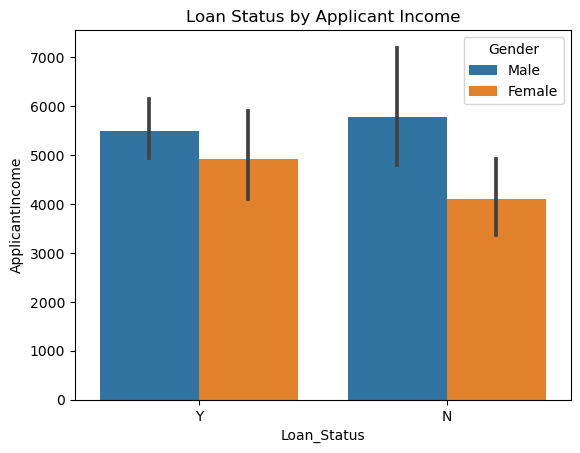

In [13]:
sns.barplot(x = 'Loan_Status', y='ApplicantIncome',data = loan_data, hue='Gender')
plt.title('Loan Status by Applicant Income')

plt.show()

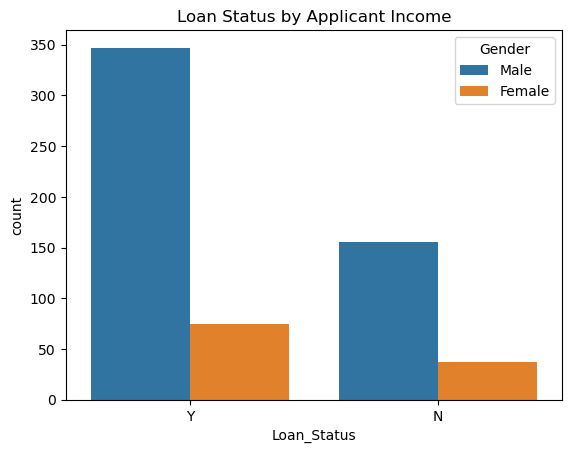

In [14]:
sns.countplot(x="Loan_Status", data=loan_data, hue='Gender')
plt.title('Loan Status by Applicant Income')
plt.show()

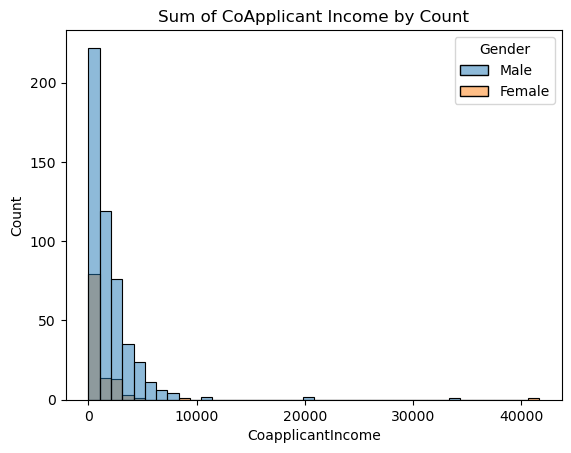

In [15]:
sns.histplot(data=loan_data, x="CoapplicantIncome",bins=40,hue="Gender")
plt.title('Sum of CoApplicant Income by Count')
plt.show()

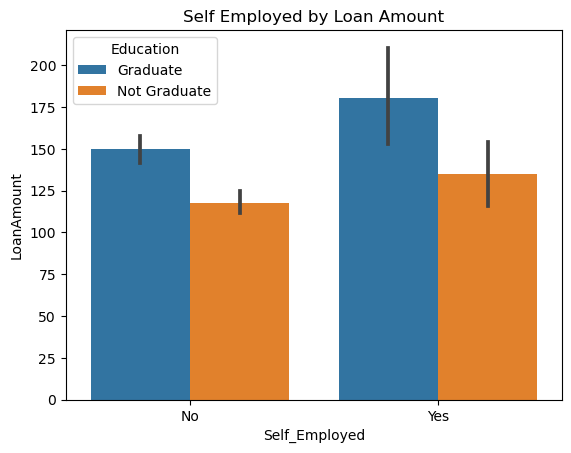

In [16]:
sns.barplot(x = 'Self_Employed', y='LoanAmount',data = loan_data, hue='Education')
plt.title('Self Employed by Loan Amount')

plt.show()

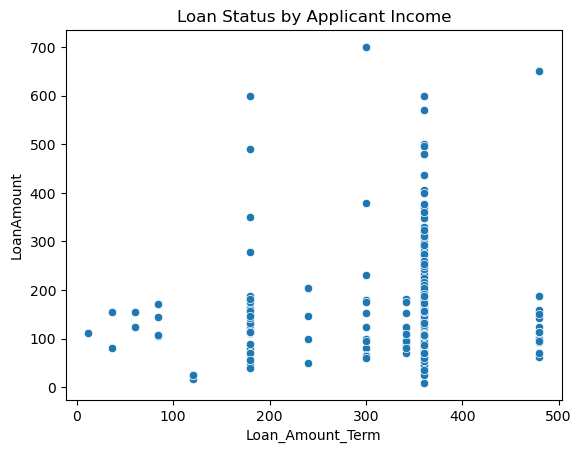

In [17]:
sns.scatterplot(data=loan_data, x="Loan_Amount_Term", y="LoanAmount")
plt.title('Loan Status by Applicant Income')
plt.show()

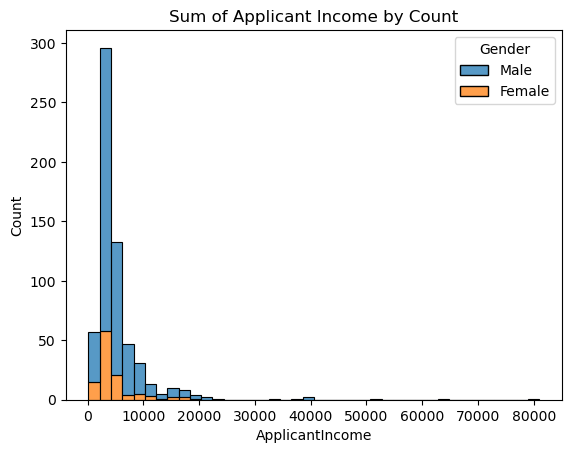

In [18]:
sns.histplot(data=loan_data, x="ApplicantIncome",bins=40,multiple="stack",hue="Gender")
plt.title('Sum of Applicant Income by Count')
plt.show()

SAVING THE DATASET FOR FUTURE ANALYSIS

loan_data.to_cvs('Lon)

In [20]:
loan_data.to_csv('Loan_data_cleaned',index=False)